In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

In [2]:
def fitnessFunction(v):
    return (1+sp.cos(0.04*v)**2) * (sp.exp(-v**2/20000))

In [3]:
#test
fitnessFunction(1)

1.9983009356066115

### Exercise 2

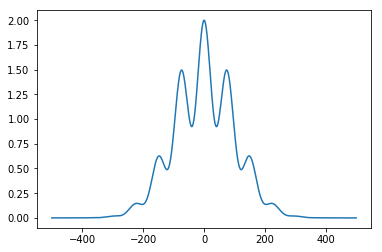

In [4]:
xsim = np.arange(-500,500)
ysim = fitnessFunction(xsim)
plt.plot(xsim,ysim)
plt.show()

In [5]:
fitnessFunction(0) #True maximum

2.0

### Exercise 3 & 4 & 5

In [6]:
import numpy.random as rn
import matplotlib as mpl
from scipy import optimize

In [7]:
# Code referenced from:
# https://perso.crans.org/besson/publis/notebooks/Simulated_annealing_in_Python.html

def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
#         T = temperature(step)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs


In [8]:
interval = (-500, 500)

# def f(x):
#     """ Function to minimize."""
#     return x ** 2

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

def random_start():
    """ Random point in the interval."""
    a, b = interval
#     return a + (b - a) * rn.random_sample()
    return X0

def cost_function(x):
    """ Cost of x = f(x)."""
    return -fitnessFunction(x)

def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
#         print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
#         print("    - Acceptance probabilty = 1")
        return 1
    else:
        p = np.exp(- (new_cost - cost) * 100 / temperature ) ## Adjusted by multiplying 100 from the original logic
#         print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p
    
def temperature(fraction):
# def temperature(step):
    """ Example of temperature dicreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction)*T0)
#     return T0 * 0.95**step

MEMO: The order of temperature has to be reasonable compared to the order of cost, otherwise the probability of acceptance can be too high or too low.

In [9]:
X0, T0 = 250, 10
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True);

Step # 0/30 : T =   10, state =  250, cost = -0.0749, new_state =  250, new_cost = -0.0749 ...
Step # 1/30 : T = 9.67, state =  250, cost = -0.0749, new_state =  251, new_cost = -0.0703 ...
Step # 2/30 : T = 9.33, state =  251, cost = -0.0703, new_state =  252, new_cost = -0.0689 ...
Step # 3/30 : T =    9, state =  252, cost = -0.0689, new_state =  247, new_cost = -0.0847 ...
Step # 4/30 : T = 8.67, state =  247, cost = -0.0847, new_state =  241, new_cost = -0.106 ...
Step # 5/30 : T = 8.33, state =  241, cost = -0.106, new_state =  249, new_cost = -0.0773 ...
Step # 6/30 : T =    8, state =  249, cost = -0.0773, new_state =  251, new_cost = -0.0722 ...
Step # 7/30 : T = 7.67, state =  251, cost = -0.0722, new_state =  242, new_cost = -0.103 ...
Step # 8/30 : T = 7.33, state =  242, cost = -0.103, new_state =  236, new_cost = -0.122 ...
Step # 9/30 : T =    7, state =  236, cost = -0.122, new_state =  236, new_cost = -0.125 ...
Step #10/30 : T = 6.67, state =  236, cost = -0.125, new_

In [10]:
rn.seed(1111)
X0, T0 = 250, 10
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)

print('Optimized x value = ',round(state,5))
print('Optimized fitnessFunction value = ', round(-c,5))
# print(costs)

Optimized x value =  75.28381
Optimized fitnessFunction value =  1.49376


In [11]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("X")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("fitnessFunction")
    plt.show()

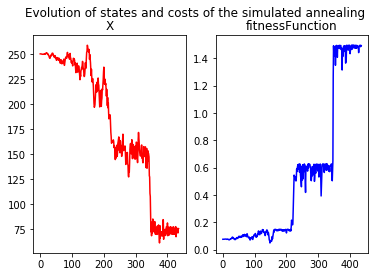

In [12]:
see_annealing(states, [-c for c in costs])

Exercise 3 latter half: 

Report this temperature and explain its significance in terms of the relationship between the search radius and the dimensions of the width of the fitness curve:

==> 

Search radius needs to be larger enough to go beyond the width of local peak, but too large search radius will harm because it makes a higher possibility to go backward to worse (smaller) fitness value.

#### Explore the initial temperature which finds the peak about 90% of the time.

In [13]:
import time

In [14]:
# Repeat the annealing 1000 times and records the last fitnessFunction value
def simulateAnnealing(X0 = 250, T0 = 10, seed = 1111, sims = 100):
    time0 = time.time()
    res = []
    for i in range(sims):
        rn.seed(seed+i)
        __, c, __, __ = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
        res += [-c]
    print('------ Simulation with initial temperature T0 =',T0,'-----')
    print('Time needed for',sims,'simulations:', round(time.time()-time0,3), 's')
#     print(res)
    print(round(sum(map(lambda x: x>=1.9 and x<=2.0,res))/sims*100,2),'% of simulations returned 1.9-2.0 fitnessFunction')
    print()
    return res

In [15]:
T0ls = np.arange(10,105,step=5)
perc_19_20 = []
for T0 in T0ls:
    res = simulateAnnealing(T0=T0)
    perc_19_20 += [sum(map(lambda x: x>=1.9 and x<=2.0,res))]
#     simulateAnnealing(T0=T0)

------ Simulation with initial temperature T0 = 10 -----
Time needed for 100 simulations: 1.305 s
0.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 15 -----
Time needed for 100 simulations: 1.244 s
10.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 20 -----
Time needed for 100 simulations: 1.261 s
24.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 25 -----
Time needed for 100 simulations: 1.241 s
38.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 30 -----
Time needed for 100 simulations: 1.184 s
56.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 35 -----
Time needed for 100 simulations: 1.2 s
64.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 40 -----
Time needed for 100 si

Note about Visualization:
    - SD is calculated just by 'p(1-p)/# of simulation' for each inital temperature because it is a proportion and simulation results in each inital temperature are independent.

In [16]:
n_sims = 100
perc_19_20_ub = [p + (p/100*(1-p/100)/ n_sims )**0.5 * 100 for p in perc_19_20]
perc_19_20_lb = [p - (p/100*(1-p/100)/ n_sims )**0.5 * 100 for p in perc_19_20]

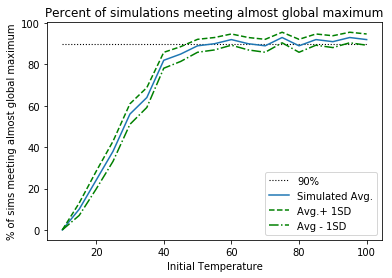

In [17]:
plt.figure()

plt.plot(T0ls, [90 for _ in range(len(perc_19_20))], ':', color='k', lw=1.1, label='90%')
plt.plot(T0ls, perc_19_20, label='Simulated Avg.')
plt.plot(T0ls, perc_19_20_ub,'--',color='g', label='Avg.+ 1SD')
plt.plot(T0ls, perc_19_20_lb,'-.',color='g', label='Avg - 1SD')

plt.title("Percent of simulations meeting almost global maximum")
plt.xlabel("Initial Temperature")
plt.ylabel("% of sims meeting almost global maximum")
plt.legend()
plt.show()

Observed trends:
1. As inital temperature goes high, the % of 'successful' optimizations goes linearly high (but as stated in 4., this is only true for the current acceptance .
2. It reaches at 90% with initial temperature = 55 for the first time.
3. After it reaches 90%, it won't converge to 100% but moves above and below 90%.
4. In order to scale the fitness value to be balanced with the order of temperature (currently, the former is 1~2 and latter is 10 or more, which is pretty unbalanced and make the acceptance rate too high in initial temperature = 10 case), I played around the acceptance probability formula (i.e. 'p = np.exp(- (new_cost - cost) * 100 / temperature )'). When I chose '* 10' instead of '* 100', the percent of simulations finding global maximum decreased as intial temperature went up, unlike the increasing trend we see in the graph above.

Explanations:
- Higher initial or intermediate temperatures result in higher acceptance rate, which ends up with higher chances of jumping over the local minimum. Therefore, the % of success goes higher as initial temperature goes higher.
- Once reaching at global maximum, the ideal is the temperature is already cold enough so that they never jumps out to another local maximum, but it is not always the case. Therefore, the % of success is less likely to hit 100%.
- About the acceptance probability formula, '* 10' option gives higher acceptancerate all the time than '* 100' one does, particularly when the initial temperature is high. This leads to the consequence with higher chances to escape from global maximum even when the iteration once reaches at there.

### Additional simulations to show 4. of the observed trends.

In [18]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) * 10 / temperature  ) ## <- THIS IS THE LINE MADE CORRECTION FROM *100 TO *10
        return p
    
T0ls = np.arange(10,105,step=5)
perc_19_20 = []
for T0 in T0ls:
    res = simulateAnnealing(T0=T0)
    perc_19_20 += [sum(map(lambda x: x>=1.9 and x<=2.0,res))]
#     simulateAnnealing(T0=T0)

n_sims = 100
perc_19_20_ub = [p + (p/100*(1-p/100)/ n_sims )**0.5 * 100 for p in perc_19_20]
perc_19_20_lb = [p - (p/100*(1-p/100)/ n_sims )**0.5 * 100 for p in perc_19_20]

------ Simulation with initial temperature T0 = 10 -----
Time needed for 100 simulations: 1.203 s
92.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 15 -----
Time needed for 100 simulations: 1.205 s
82.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 20 -----
Time needed for 100 simulations: 1.234 s
83.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 25 -----
Time needed for 100 simulations: 1.44 s
77.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 30 -----
Time needed for 100 simulations: 1.267 s
77.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 35 -----
Time needed for 100 simulations: 1.16 s
75.0 % of simulations returned 1.9-2.0 fitnessFunction

------ Simulation with initial temperature T0 = 40 -----
Time needed for 100 s

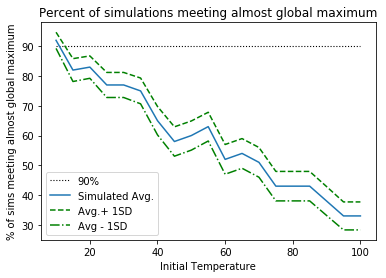

In [19]:
plt.figure()

plt.plot(T0ls, [90 for _ in range(len(perc_19_20))], ':', color='k', lw=1.1, label='90%')
plt.plot(T0ls, perc_19_20, label='Simulated Avg.')
plt.plot(T0ls, perc_19_20_ub,'--',color='g', label='Avg.+ 1SD')
plt.plot(T0ls, perc_19_20_lb,'-.',color='g', label='Avg - 1SD')

plt.title("Percent of simulations meeting almost global maximum")
plt.xlabel("Initial Temperature")
plt.ylabel("% of sims meeting almost global maximum")
plt.legend()
plt.show()